In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key

In [2]:
# create sets of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size= 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add lats and longs to list
coordinates = list(lat_lngs)
coordinates

[(71.84017441710074, 118.97361040929673),
 (14.818538815801972, -95.74180022370122),
 (14.100424235436066, 40.22338811375553),
 (48.06391697033703, 133.34739758944067),
 (79.37048095528783, 69.27236505960391),
 (-18.13053182045624, -100.40736238020972),
 (-64.04884467997633, 165.65440729671872),
 (-0.3959192205667392, 124.77448599820502),
 (-17.080796608970388, 61.563327838396106),
 (-5.730591846575635, -152.75584427811887),
 (70.89905240445407, -94.12398633731974),
 (-72.18849139838778, 57.43360390379553),
 (-67.51452434664695, 168.54596114788347),
 (57.9120980736767, -23.1368768394654),
 (-53.178035952802254, -40.24383479867217),
 (60.78140657550844, -176.00968357328614),
 (42.35407842420864, -90.74440841406637),
 (-38.08155830994463, 92.89522589921086),
 (81.08488212663636, -18.96452227521422),
 (-50.42898488126805, -171.73662511074758),
 (-15.161861825923026, -55.63635467208452),
 (-1.7706148127510914, 159.3409202147182),
 (-36.68342123461494, -122.61906354602894),
 (53.62415018744

In [4]:
from citipy import citipy

In [5]:
# Create list for holding cities
cities = []

In [6]:
# Identify nearest city to each set of coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
len(cities)

657

In [7]:
# 1 Import dependencies and declare counters empty list to hold weather data 
import requests
from pprint import pprint
from datetime import datetime

city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# print the beginning of the logging
print('Beginning Data Retrieval      ')
print('------------------------------')

# creat counters
record_count = 1
set_count = 1

# 2 Loop through the cities
for i, city in enumerate(cities):
    
    # 3 Group the cities in sets of 50 to log the process as we find the weather data for each city.
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
    
    # 4 create city url
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # 5 Log the url, record, and set numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to record count
    record_count += 1
    
    # Run API Request for each city
    try:
        # Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        # Parse the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y=%m-%d %H:%M:%S')
        # Append city information into city_data list
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                          'Date': city_date
                         })
    # If an error is experienced, skip the city
    except:
        print('City not found.  Skipping...')            
        pass
    
# Indicate that Data Loading is complete
print('----------------------------')
print('Data Retrieval Complete     ')
print('----------------------------')

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | xadani
City not found.  Skipping...
Processing Record 3 of Set 1 | adwa
Processing Record 4 of Set 1 | smidovich
Processing Record 5 of Set 1 | amderma
City not found.  Skipping...
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | tondano
Processing Record 9 of Set 1 | grand gaube
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | taolanaro
City not found.  Skipping...
Processing Record 13 of Set 1 | grindavik
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | dubuque
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | illoqqortoormiut
City not found.  Skipping...
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | chapada d

Processing Record 39 of Set 4 | ugoofaaru
Processing Record 40 of Set 4 | carutapera
Processing Record 41 of Set 4 | la asuncion
Processing Record 42 of Set 4 | feijo
Processing Record 43 of Set 4 | samusu
City not found.  Skipping...
Processing Record 44 of Set 4 | mamlyutka
Processing Record 45 of Set 4 | usakos
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | luganville
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | shirokiy
Processing Record 50 of Set 4 | zhangye
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | smoky lake
Processing Record 5 of Set 5 | kilindoni
Processing Record 6 of Set 5 | boulder
Processing Record 7 of Set 5 | shibetsu
Processing Record 8 of Set 5 | muhos
Processing Record 9 of Set 5 | tilichiki
Processing Record 10 of Set 5 | margate
Processing Record 11 of Set 5 | pilar
Processing Record 12 of Set 5 | smithers

City not found.  Skipping...
Processing Record 30 of Set 8 | clarence town
Processing Record 31 of Set 8 | salumbar
Processing Record 32 of Set 8 | doctor juan leon mallorquin
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | vernon
Processing Record 35 of Set 8 | isla mujeres
Processing Record 36 of Set 8 | villa del rosario
Processing Record 37 of Set 8 | tigil
Processing Record 38 of Set 8 | formoso do araguaia
City not found.  Skipping...
Processing Record 39 of Set 8 | bone
Processing Record 40 of Set 8 | samalaeulu
City not found.  Skipping...
Processing Record 41 of Set 8 | tucupita
Processing Record 42 of Set 8 | ternate
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | marcona
City not found.  Skipping...
Processing Record 47 of Set 8 | saint-joseph
Processing Record 48 of Set 8 | soyo
Processing Record 49 of Set 8 | port hardy
Processing Record

Processing Record 17 of Set 12 | miyang
Processing Record 18 of Set 12 | chaa-khol
City not found.  Skipping...
Processing Record 19 of Set 12 | lavrentiya
Processing Record 20 of Set 12 | barwadih
Processing Record 21 of Set 12 | acari
Processing Record 22 of Set 12 | gamba
Processing Record 23 of Set 12 | yingkou
Processing Record 24 of Set 12 | bindura
Processing Record 25 of Set 12 | kadykchan
City not found.  Skipping...
Processing Record 26 of Set 12 | san lorenzo
Processing Record 27 of Set 12 | huambo
Processing Record 28 of Set 12 | luena
Processing Record 29 of Set 12 | fuyu
Processing Record 30 of Set 12 | luanda
Processing Record 31 of Set 12 | jalu
Processing Record 32 of Set 12 | half moon bay
Processing Record 33 of Set 12 | camacupa
Processing Record 34 of Set 12 | saldanha
Processing Record 35 of Set 12 | kodinar
Processing Record 36 of Set 12 | parczew
Processing Record 37 of Set 12 | coahuayana
Processing Record 38 of Set 12 | chany
Processing Record 39 of Set 12 | j

In [10]:
len(city_data)

605

In [11]:
# Convert array of dictionaries to Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-42.27,79,48,4.18,RU,2021=01-28 20:04:08
1,Adwa,14.1646,38.8955,56.44,38,0,2.59,ET,2021=01-28 20:04:08
2,Smidovich,48.6000,133.8167,-12.42,85,98,4.00,RU,2021=01-28 20:04:08
3,Puerto Ayora,-0.7393,-90.3518,84.20,70,20,13.80,EC,2021=01-28 20:04:08
4,Bluff,-46.6000,168.3333,48.00,80,99,8.01,NZ,2021=01-28 20:04:09
5,Tondano,1.3038,124.9112,75.20,100,40,1.14,ID,2021=01-28 20:04:09
6,Grand Gaube,-20.0064,57.6608,78.01,80,1,3.00,MU,2021=01-28 20:04:09
7,Faanui,-16.4833,-151.7500,81.43,68,84,8.79,PF,2021=01-28 20:02:15
8,Thompson,55.7435,-97.8558,-4.00,84,75,3.44,CA,2021=01-28 19:59:23
9,Grindavik,63.8424,-22.4338,23.00,80,0,4.61,IS,2021=01-28 20:04:10


In [12]:
# Reorder columns
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021=01-28 20:04:08,71.9167,114.0833,-42.27,79,48,4.18
1,Adwa,ET,2021=01-28 20:04:08,14.1646,38.8955,56.44,38,0,2.59
2,Smidovich,RU,2021=01-28 20:04:08,48.6000,133.8167,-12.42,85,98,4.00
3,Puerto Ayora,EC,2021=01-28 20:04:08,-0.7393,-90.3518,84.20,70,20,13.80
4,Bluff,NZ,2021=01-28 20:04:09,-46.6000,168.3333,48.00,80,99,8.01
5,Tondano,ID,2021=01-28 20:04:09,1.3038,124.9112,75.20,100,40,1.14
6,Grand Gaube,MU,2021=01-28 20:04:09,-20.0064,57.6608,78.01,80,1,3.00
7,Faanui,PF,2021=01-28 20:02:15,-16.4833,-151.7500,81.43,68,84,8.79
8,Thompson,CA,2021=01-28 19:59:23,55.7435,-97.8558,-4.00,84,75,3.44
9,Grindavik,IS,2021=01-28 20:04:10,63.8424,-22.4338,23.00,80,0,4.61


In [14]:
# Create output file for data frame (csv)
output_data_file = 'weather_data/cities.csv'
# Export to the output file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

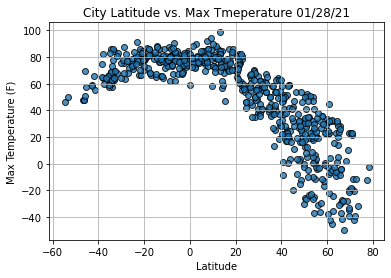

In [16]:
# Import the time module
import time

# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps,
            edgecolor='black', linewidths=1, marker= 'o',
            alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Tmeperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()

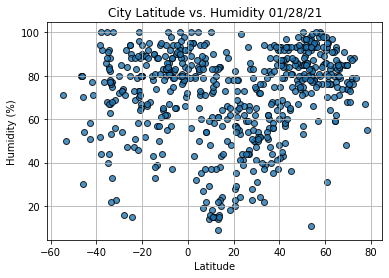

In [17]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor='black', linewidths=1, marker= 'o',
            alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig2.png')

# show plot
plt.show()

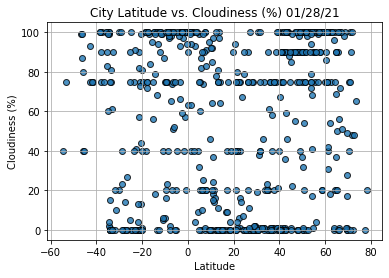

In [18]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            cloudiness,
            edgecolor='black', linewidths=1, marker= 'o',
            alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig3.png')

# show plot
plt.show()

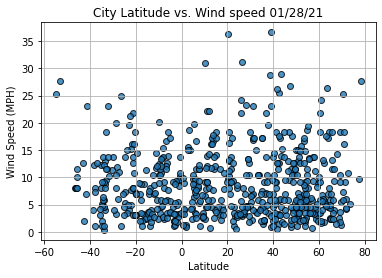

In [19]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            wind_speed,
            edgecolor='black', linewidths=1, marker= 'o',
            alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Wind speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig4.png')

# show plot
plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021=01-28 20:03:52
Lat                        -33.65
Lng                       115.333
Max Temp                       63
Humidity                       77
Cloudiness                      0
Wind Speed                  12.97
Name: 13, dtype: object

In [66]:
# Import linregress
from scipy.stats import linregress

# build a function to perform linear regression and plot the regression line with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemispher weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y_values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation for the line
    line_eq = 'y = '+str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(r_value)
    
    
    

In [53]:
# create northern and sothern hemispher dataframes
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

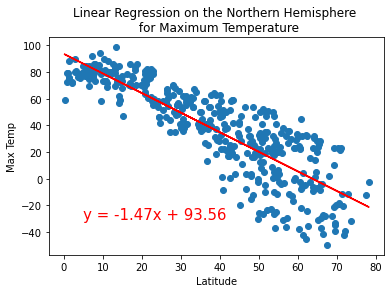

-0.8565596325275505


In [71]:
# linear regression on the Northern Hemispher
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (5,-30))


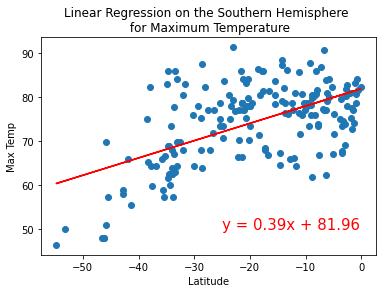

0.5632683211641072


In [67]:
# linear regression on the southern Hemispher
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-25,50))


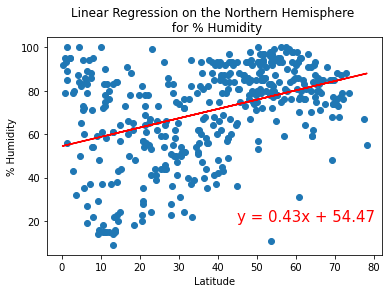

0.3969136323670942


In [68]:
# linear regression on the Northern Hemisphere and Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45,20))


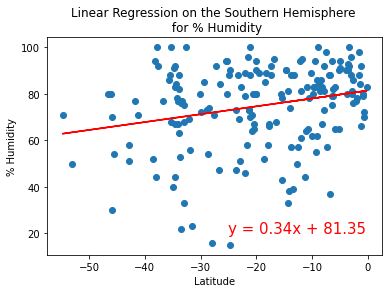

0.24878277028173915


In [69]:
# linear regression on the southern Hemispher
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-25,20))


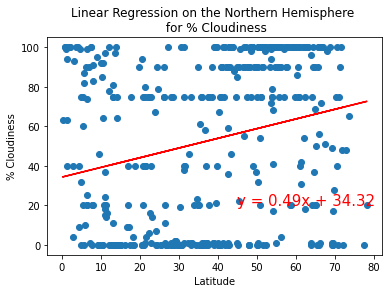

0.24168152774150495


In [70]:
# linear regression on the Northern Hemisphere and Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (45,20))


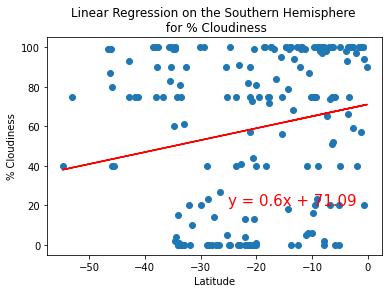

0.19598647265028296


In [72]:
# linear regression on the southern Hemisphere and cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-25,20))


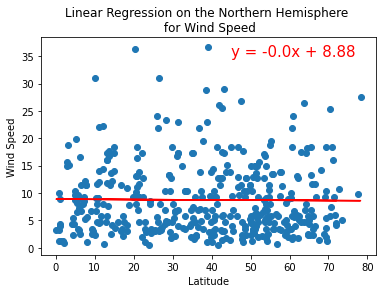

-0.011313111174084041


In [74]:
# linear regression on the Northern HemispherE and Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (45,35))


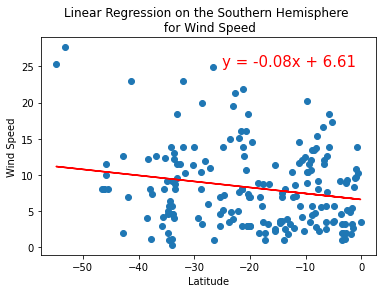

-0.19573143863151782


In [76]:
# linear regression on the southern Hemisphere and Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-25,25))
